In [3]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
%matplotlib inline
torch.manual_seed(1)    # reproducible

In [5]:
# Hyper Parameters
EPOCH = 10
BATCH_SIZE = 64
LR = 0.005         # learning rate
DOWNLOAD_MNIST = True
N_TEST_IMG = 5

In [6]:
# Mnist digits dataset
train_data = torchvision.datasets.MNIST(
    root='.tmp/mnist',
    train=True,  # this is training data
    transform=torchvision.transforms.ToTensor(
    ),  # Converts a PIL.Image or numpy.ndarray to
    # torch.FloatTensor of shape (C x H x W) and normalize in the range [0.0, 1.0]
    download=DOWNLOAD_MNIST,  # download it if you don't have it
)

Processing...
Done!


torch.Size([60000, 28, 28])
torch.Size([60000])


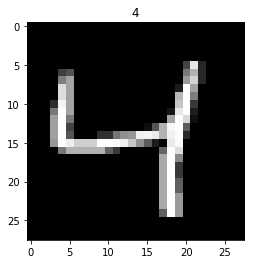

In [7]:
# plot one example
print(train_data.train_data.size())     # (60000, 28, 28)
print(train_data.train_labels.size())   # (60000)
plt.imshow(train_data.train_data[2].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[2])
plt.show()

In [8]:
# Data Loader for easy mini-batch return in training, the image batch shape will be (64, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

In [ ]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        
        self.encoder = nn.Sequential(nn.Linear(28*28, 128),
                                     nn.Tanh(),
                                     nn.Linear(128, 64),
                                     nn.Tanh(),
                                     nn.Linear(64, 12),
                                     nn.Tanh(),
                                     nn.Linear(12, 3))